In [1]:
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt
from sopt.optimizers.tensorflow2 import Curveball, NonLinearConjugateGradient


gpu = tf.config.experimental.list_physical_devices('GPU')[0]
tf.config.experimental.set_memory_growth(gpu, True)

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
z_true = tf.constant(np.random.randn(3,100).astype('float32'))

random_mat = np.random.randn(3,3)
random_symmetric_mat = random_mat + random_mat.T
evals, evecs = np.linalg.eig(random_symmetric_mat)


In [4]:
affine_transform = tf.constant(evecs, dtype='float32')

y_true = tf.reshape(affine_transform @ z_true, [-1])
#y_true_flat = y_true.flatten()

In [24]:
def y_pred(z_flat):
    z_arr = tf.reshape(z_flat, (3, -1))
    return tf.reshape(affine_transform @ z_arr, [-1])

def loss_fn(y):
    return 0.5 * tf.reduce_sum((y - y_true)**2)
def diag_hessian_fn(v):
    return 1.0

In [25]:
z_guess = np.random.randn(300).astype('float32')
v1 = tf.Variable(z_guess)
v2 = tf.Variable(z_guess)
v3 = tf.Variable(z_guess)

v4 = tf.Variable(z_guess)
v5 = tf.Variable(z_guess)

In [26]:
# Testing the hvp implementations

In [27]:
cb1 = Curveball(input_var=v1, predictions_fn=y_pred, loss_fn=loss_fn, 
                diag_hessian_fn=diag_hessian_fn, name='cb1', damping_factor=1e-4,
                new_version=False)
cb2 = Curveball(input_var=v2, predictions_fn=y_pred, loss_fn=loss_fn, 
                name='cb2', 
                new_version=False)
cg = NonLinearConjugateGradient(input_var=v3, objective_fn=lambda v: loss_fn(y_pred(v)), name='cg')

In [28]:
cb4 = Curveball(input_var=v4, predictions_fn=y_pred, loss_fn=loss_fn, diag_hessian_fn=diag_hessian_fn, name='cb4', new_version=True)
cb5 = Curveball(input_var=v5, predictions_fn=y_pred, loss_fn=loss_fn, name='cb5', new_version=True)

In [29]:
cb_losses1 = []
cb_losses2 = []
cg_losses = []

cb_losses4 = []
cb_losses5 = []

for i in range(20):
    cb_losses1.append(cb1.minimize().numpy())
    cb_losses2.append(cb2.minimize().numpy())
    cg_losses.append(cg.minimize().numpy())
    
    cb_losses4.append(cb4.minimize().numpy())
    cb_losses5.append(cb5.minimize().numpy())
    print(cb_losses1[-1], cb_losses2[-1], cg_losses[-1], cb_losses4[-1], cb_losses5[-1])

2.6567527e-06 66.48072 243.36116 66.48072 66.48072
1.2996213e-07 16.620178 202.98117 16.620178 16.620178
7.0658204e-09 6.492258 138.67464 6.492258 6.492258
3.9337495e-13 6.492258 59.151264 6.492258 6.492258
1.1260438e-13 1.6230648 5.5463457 1.6230648 1.6230648
8.876234e-14 9.377128e-13 0.83314985 9.377128e-13 9.377128e-13
7.5855995e-14 9.377128e-13 0.12515236 9.377128e-13 9.377128e-13
6.145085e-14 3.6073152e-13 0.01879989 3.6073152e-13 3.6073152e-13
5.4317668e-14 2.0550845e-13 0.0028240406 2.0550845e-13 2.0550845e-13
5.3901335e-14 1.7987097e-13 0.00042421732 1.7987097e-13 1.7987097e-13
6.153412e-14 1.6441111e-13 6.3725645e-05 1.6441111e-13 1.6441111e-13
5.9230405e-14 1.6552134e-13 9.57342e-06 1.6552134e-13 1.6552134e-13
5.4761757e-14 1.6246649e-13 1.4382442e-06 1.6246649e-13 1.6246649e-13
5.3901335e-14 1.6357671e-13 2.1598649e-07 1.6357671e-13 1.6357671e-13
5.4317668e-14 1.6291058e-13 3.244205e-08 1.6291058e-13 1.6291058e-13
6.1117784e-14 1.6557511e-13 4.8792703e-09 1.6557511e-13 1.655

In [67]:
cb_losses1 = []
cb_losses2 = []
cg_losses = []

for i in range(20):
    cb_losses1.append(cb1.minimize().numpy())
    cb_losses2.append(cb2.minimize().numpy())
    cg_losses.append(cg.minimize().numpy())
    print(cb_losses1[-1], cb_losses2[-1], cg_losses[-1])

3.414999e-11 3.414999e-11 1.9058366e-13
9.683915e-12 9.683915e-12 7.7757245e-14
2.27313e-12 2.27313e-12 6.9097505e-14
7.548927e-13 7.548927e-13 3.5235703e-14
3.933416e-13 3.933416e-13 2.935152e-14
2.9422471e-13 2.9422471e-13 2.2246094e-14
2.6891163e-13 2.6891163e-13 1.8138269e-14
1.9996678e-13 1.9996678e-13 1.769418e-14
2.323853e-13 2.323853e-13 1.769418e-14
1.9996678e-13 1.9996678e-13 1.769418e-14
2.323853e-13 2.323853e-13 1.769418e-14
1.9996678e-13 1.9996678e-13 1.769418e-14
2.323853e-13 2.323853e-13 1.769418e-14
1.9996678e-13 1.9996678e-13 1.769418e-14
2.323853e-13 2.323853e-13 1.769418e-14
1.9996678e-13 1.9996678e-13 1.769418e-14
2.323853e-13 2.323853e-13 1.769418e-14
1.9996678e-13 1.9996678e-13 1.769418e-14
2.323853e-13 2.323853e-13 1.769418e-14
1.9996678e-13 1.9996678e-13 1.769418e-14


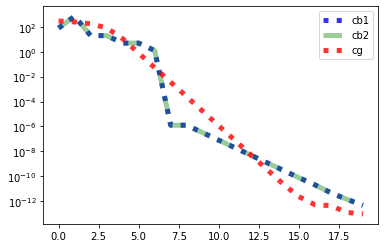

In [74]:
plt.plot(cb_losses1, color='blue', ls=':', linewidth=5.0, alpha=0.8, label='cb1')
plt.plot(cb_losses2, color='green', ls='--', linewidth=5.0, alpha=0.4, label='cb2')
plt.plot(cg_losses, color='red', ls=':', linewidth=5.0, alpha=0.8, label='cg')
plt.yscale('log')
plt.legend(loc='best')
plt.show()